In [1]:
# ------------------------------------------------------------------------
#
# TITLE - make_simulation_filters.ipynb
# AUTHOR - James Lane
# PROJECT - AST 1500
#
# ------------------------------------------------------------------------
#
# Docstrings and metadata:
'''Make filter parameters for OOMAO simulations
'''

__author__ = "James Lane"

In [2]:
### Imports

## Basic
%run ../../src/_helpers/basic_imports.py
import pdb

## Plotting
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import colors
from matplotlib import cm

## Scipy
import scipy.io

## Astropy
from astropy.io import fits
from astropy.table import Table

## Project-specific
sys.path.insert(0,'../../src/')
import ast1500.spectra


Basic imports:
numpy as np, sys, os, copy, glob, subprocess,
matplotlib.pyplot as plt, matplotlib as mpl, astropy.units as apu


# Read the table of filter properties

In [3]:
# Read in the filter properties from SVO
tab_all = Table.read('../../data/filter_data/filter_properties.txt', format='ascii.csv')

In [4]:
# Display table
tab = tab_all[4:10]
tab

Name,lambda_mean,lambda_eff,lambda_max,lambda_min,ZP
str17,float64,float64,int64,int64,float64
MMT/MMTCam.i,7674.9,7591.2,6790,8506,2535.4
MMT/MMTCam.z,9454.2,9334.0,8225,10727,2188.7
MMT/MMIRS.Y,10200.5,10166.4,9423,11054,2093.2
MMT/MMIRS.J,12519.1,12453.0,11490,13584,1556.0
MMT/MMIRS.H,16437.2,16293.6,14649,18267,1032.5
MMT/MMIRS.Ks,21612.5,21454.3,19541,23833,668.3


In [5]:
# Extract the properties
name = tab['Name'].data
lambda_mean = tab['lambda_mean'].data
lambda_eff = tab['lambda_eff'].data
lambda_max = tab['lambda_max'].data
lambda_min = tab['lambda_min'].data
zero_point = tab['ZP'].data

# Read the filter profiles themselves
Going to read $i$ and $z$ from the MMTCam and $Y$, $J$, $H$, and $K_{s}$ from MMIRS

In [12]:
import importlib
importlib.reload(ast1500.spectra)

<module 'ast1500.spectra' from '../../src/ast1500/spectra.py'>

In [13]:
filter_i = ast1500.spectra.PhotometricFilter(filter_class='MMTCam',filter_name='i')
filter_z = ast1500.spectra.PhotometricFilter(filter_class='MMTCam',filter_name='z')
filter_Y = ast1500.spectra.PhotometricFilter(filter_class='MMIRS',filter_name='Y')
filter_J = ast1500.spectra.PhotometricFilter(filter_class='MMIRS',filter_name='J')
filter_H = ast1500.spectra.PhotometricFilter(filter_class='MMIRS',filter_name='H')
filter_Ks = ast1500.spectra.PhotometricFilter(filter_class='MMIRS',filter_name='Ks')

filter_arr = [filter_i,filter_z,filter_Y,filter_J,filter_H,filter_Ks]
n_filters = len(filter_arr)

In [14]:
filter_i.response(np.array([7000,7500,8000]))

array([0.92608727, 0.94202034, 0.94017776])

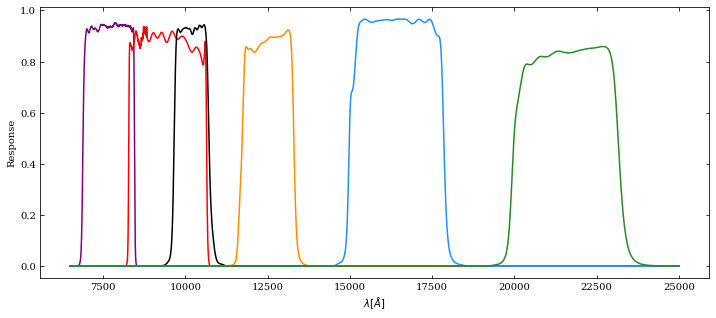

In [16]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
wavelength_range = np.arange(6500,25000,1)

fig,ax = filter_i.plot_response(wavelength=wavelength_range, fig=fig, ax=ax, 
                                plot_kws={'c':'Purple'})
fig,ax = filter_z.plot_response(wavelength=wavelength_range, fig=fig, ax=ax,
                                plot_kws={'c':'Red'})
fig,ax = filter_Y.plot_response(wavelength=wavelength_range, fig=fig, ax=ax,
                                plot_kws={'c':'Black'})
fig,ax = filter_J.plot_response(wavelength=wavelength_range, fig=fig, ax=ax,
                                plot_kws={'c':'DarkOrange'})
fig,ax = filter_H.plot_response(wavelength=wavelength_range, fig=fig, ax=ax,
                                plot_kws={'c':'DodgerBlue'})
fig,ax = filter_Ks.plot_response(wavelength=wavelength_range, fig=fig, ax=ax,
                                plot_kws={'c':'ForestGreen'})

fig.set_facecolor('White')
plt.show()

# Calculate properties in a simple manner

## Wavelength Minima and Maxima
Calculate the minimum wavelength for the filter. Figure out the first wavelength where the filter response reaches half it's maxima

In [22]:
filter_i.filter_name

'i'

In [23]:
tab

Name,lambda_mean,lambda_eff,lambda_max,lambda_min,ZP
str17,float64,float64,int64,int64,float64
MMT/MMTCam.i,7674.9,7591.2,6790,8506,2535.4
MMT/MMTCam.z,9454.2,9334.0,8225,10727,2188.7
MMT/MMIRS.Y,10200.5,10166.4,9423,11054,2093.2
MMT/MMIRS.J,12519.1,12453.0,11490,13584,1556.0
MMT/MMIRS.H,16437.2,16293.6,14649,18267,1032.5
MMT/MMIRS.Ks,21612.5,21454.3,19541,23833,668.3


In [78]:
for i in range(n_filters):
    
    wavelength_data = filter_arr[i].wavelength_data
    response_data = filter_arr[i].response_data
    response_max = max(response_data)
    where_response_half_max = np.where( response_data > 0.01 )[0]
    min_wavelength = wavelength_data[where_response_half_max[0]]
    max_wavelength = wavelength_data[where_response_half_max[-1]]
        
#     fig = plt.figure()
#     ax = fig.add_subplot(111)
#     fig, ax = filter_arr[i].plot_response(fig=fig, ax=ax, plot_kws={'c':'Black','lw':'0.5'})
#     ax.axvline(min_wavelength, c='Black', linestyle='dashed', linewidth=0.5)
#     ax.axvline(max_wavelength, c='Black', linestyle='dashed', linewidth=0.5)
#     fig.set_facecolor('White')
#     plt.show()
    
    print('Name: '+filter_arr[i].filter_name)
    print('Wavelength min: '+str(min_wavelength))
    print('Wavelength max: '+str(max_wavelength))
    print('Bandwidth: '+str(max_wavelength-min_wavelength)+'\n')
###i

Name: i
Wavelength min: 6795.0
Wavelength max: 8505.0
Bandwidth: 1710.0

Name: z
Wavelength min: 8230.0
Wavelength max: 10725.0
Bandwidth: 2495.0

Name: Y
Wavelength min: 9430.0
Wavelength max: 11030.0
Bandwidth: 1600.0

Name: J
Wavelength min: 11500.0
Wavelength max: 13570.0
Bandwidth: 2070.0

Name: H
Wavelength min: 14660.0
Wavelength max: 18260.0
Bandwidth: 3600.0

Name: Ks
Wavelength min: 19560.0
Wavelength max: 23810.0
Bandwidth: 4250.0



## Central wavelength
Need to calculate the zero point in number of photons for each filter. First we take a standard star and attempt to calculate it's zero point for each filter and compare with the known results

In [36]:
for i in range(n_filters):
    
    wavelength_data = filter_arr[i].wavelength_data
    response_data = filter_arr[i].response_data
    wavelength_delta = np.diff(wavelength_data)
    assert np.all(wavelength_delta==wavelength_delta[0])
    wavelength_delta = wavelength_delta[0]
    
    central_wavelength = np.sum(wavelength_data*response_data*wavelength_delta)/\
        np.sum(response_data*wavelength_delta)
    
    print('Name: '+filter_arr[i].filter_name)
    print('Central Wavelength: '+str(central_wavelength))
###i

Name: i
Central Wavelength: 7674.903941515325
Name: z
Central Wavelength: 9454.210171930928
Name: Y
Central Wavelength: 10200.456175014866
Name: J
Central Wavelength: 12519.107182548225
Name: H
Central Wavelength: 16437.212333339667
Name: Ks
Central Wavelength: 21612.452221440868


## Find the zero point.
First determine the zero point for constant 3631 Jy

In [73]:
# Figure out the zero-point in flambda units
wavelengths = np.arange(7000,25000,1.0)
ab_zp_fnu = np.ones_like(wavelengths) * 3631 * (10**-26) # AB zero point in fnu in Watts / Hz / square meter
c_in_angstrom = 3E18 # Speed of light in angstroms / second
ab_zp_flambda = ab_zp_fnu * c_in_angstrom / wavelengths**2

In [77]:
for i in range(n_filters):
    
    ab_zp_flambda_convolve = ab_zp_flambda * filter_arr[i].response(wavelengths)
    # dlambda is 1.0
    ab_zp = 100*100*np.sum( ab_zp_flambda_convolve * (wavelengths/(c_in_angstrom*6.626E-34)) )
    
    print('Name: '+filter_arr[i].filter_name)
    print('Zero-point: '+str(ab_zp/1E12))
###i

Name: i
Zero-point: 96.94492476015722
Name: z
Zero-point: 121.8941979108795
Name: Y
Zero-point: 54.707081528518145
Name: J
Zero-point: 62.51799735656849
Name: H
Zero-point: 91.52309774193384
Name: Ks
Zero-point: 68.56771274583345


## Read the spectral library

In [53]:
spec_library = ast1500.spectra.ESOSpectralLibrary()
vega_spec = spec_library.read_spectra('uka0v',flambda=True)

In [67]:
vega_wavelength = vega_spec.wavelength
assert np.any( np.diff(vega_wavelength) == np.diff(vega_wavelength)[0] )
vega_delta_wavelength = np.diff(vega_wavelength)[0]
vega_flambda = vega_spec.data
planck_constant = 6.626E-34

In [83]:
for i in range(n_filters):
    
    vega_wavelength_response = filter_arr[i].response(vega_wavelength)
    vega_flambda_convolve = vega_flambda * vega_wavelength_response
    
#     plt.plot(vega_wavelength,vega_flambda_convolve)
#     fig = plt.gcf()
#     fig.set_facecolor('White')
#     plt.show()

    # Calculate the zero point in number of photons
    zp = np.sum( vega_flambda_convolve * \
                (vega_wavelength/(planck_constant*c_in_angstrom)) * \
                vega_delta_wavelength \
               )
    zp /= np.sum( vega_wavelength_response * \
                  c_in_angstrom * vega_delta_wavelength /\
                  (vega_wavelength**2)
                )
    print('Name: '+filter_arr[i].filter_name)
    print('Zero-point: '+str(zp))
###i

Name: i
Zero-point: 1.7958503449634025e+18
Name: z
Zero-point: 1.8743981694387213e+18
Name: Y
Zero-point: 1.9133905410195302e+18
Name: J
Zero-point: 1.7381867155325197e+18
Name: H
Zero-point: 1.501911192101156e+18
Name: Ks
Zero-point: 1.2762034565975055e+18


Try from the filters recorded properties

In [81]:
for i in range(n_filters):
    this_filter = tab[i]
    eff_wavelength = this_filter['lambda_eff']
    zp_Jy = this_filter['ZP']
    zp_W = zp_Jy * 10**-26
    zp_ph = zp_W * ( eff_wavelength / (3E18 * 6.626E-34) )
    print(zp_ph)

9.682427044974343e-05
0.00010277354764060771
0.00010705457530938727
9.74789616661636e-05
8.463196498641715e-05
7.212953360499042e-05


# Just make new OOMAO filters out of old ones

In [84]:
OOMAO_filter_names = np.array(['z','Y','J','H','Ks'])
OOMAO_filter_cents = np.array([0.945,1.020,1.215,1.654,2.157])
OOMAO_filter_widths = np.array([0.25,0.16,0.26,0.29,0.32])
OOMAO_filter_zps = np.array([2.7,1.7,1.9,1.1,0.55])*1e12

In [95]:
new_OOMAO_filters = [
    ['z','J'],
    ['Y','J'],
    ['J','H'],
    ['H','Ks']
]
n_new_filters = len(new_OOMAO_filters)

new_filter_names = np.empty(n_new_filters,dtype='U10')
new_filter_cents = np.zeros(n_new_filters)
new_filter_widths = np.zeros(n_new_filters)
new_filter_zps = np.zeros(n_new_filters)

In [97]:
for i in range(n_new_filters):
    
    comp_filter_names = new_OOMAO_filters[i]
    n_comp_filters = len(comp_filter_names)
    new_filter_name = ''
    comp_filter_inds = []
    for name in comp_filter_names:
        comp_filter_inds.append(np.where( OOMAO_filter_names == name )[0][0])
        new_filter_name += name
    ###i
    
    
    comp_filter_cents = OOMAO_filter_cents[comp_filter_inds]
    comp_filter_widths = OOMAO_filter_widths[comp_filter_inds]
    comp_filter_zps = OOMAO_filter_zps[comp_filter_inds]
    
    new_filter_names[i] = new_filter_name
    new_filter_cents[i] = np.sum(comp_filter_cents*comp_filter_zps) / np.sum(comp_filter_zps)
    new_filter_widths[i] = np.sum(comp_filter_widths)
    new_filter_zps[i] = np.sum(comp_filter_zps)
###i

In [102]:
for i in range(n_new_filters):
    print(new_filter_names[i]+'  '+str(new_filter_cents[i])+' , '+str(new_filter_widths[i])+' , '+str(new_filter_zps[i])+' )')
###i

zJ  1.0565217391304347 , 0.51 , 4600000000000.0 )
YJ  1.1229166666666666 , 0.42000000000000004 , 3600000000000.0 )
JH  1.3759666666666666 , 0.55 , 3000000000000.0 )
HKs  1.8216666666666668 , 0.61 , 1650000000000.0 )


In [106]:
(1.654e-6*1.1e12+2.179e-6*7.0e11)/(1.1e12+7.0e11) 

1.8581666666666666e-06